<a href="https://colab.research.google.com/github/ZiadMAlsawy/ML_Project/blob/Raneem_Branch/Copy_of_task2_with_power_transform_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import skew
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer



In [ ]:
loan = pd.read_csv('/content/Loan.csv')


In [ ]:
loan.head()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0.0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0.0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0.0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0.0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1.0,36.0


In [ ]:
loan.tail()


,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
7519,2038-08-03,48,22733,605,Employed,Bachelor,26,22328,36,Married,...,1894.416667,0.917633,5,47334,0.204828,0.189307,817.673759,0.688166,0.0,55.0
7520,2038-08-04,51,20113,661,Employed,Doctorate,27,12539,48,Single,...,1676.083333,0.664580,11,5822,0.177039,0.176884,366.294740,0.288348,0.0,46.0
7521,2038-08-05,20,40259,549,Unemployed,High School,0,28517,60,Married,...,3354.916667,0.908652,6,3552,0.259017,0.293509,911.283786,0.437055,0.0,59.0
7522,2038-08-06,42,35367,599,Employed,Bachelor,21,13105,60,Married,...,2947.250000,0.875970,4,29195,0.218605,0.216863,359.612557,0.368687,0.0,54.0
7523,2038-08-07,45,67338,603,Employed,Bachelor,20,19353,48,Married,...,5611.500000,0.664515,4,53088,0.212853,0.200000,NaN,NaN,NaN,NaN


In [ ]:
loan.shape


(7524, 36)

In [ ]:
loan.dtypes


,0
ApplicationDate,object
Age,int64
AnnualIncome,int64
CreditScore,int64
EmploymentStatus,object
EducationLevel,object
Experience,int64
LoanAmount,int64
LoanDuration,int64
MaritalStatus,object


In [ ]:
loan.describe()


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,7524.000000,...,7524.000000,7524.000000,7524.000000,7.524000e+03,7524.000000,7524.000000,7523.000000,7523.000000,7523.000000,7523.000000
mean,39.617092,59727.100478,571.618288,17.392743,24876.997076,53.791069,1.525120,451.242158,0.283874,3.037081,...,4937.776371,0.798499,5.033892,7.291423e+04,0.238894,0.238894,916.062536,0.402985,0.243121,50.686827
std,11.675561,41263.539657,51.497647,11.337185,13631.779011,24.717722,1.400056,236.536359,0.158455,1.735411,...,3364.358460,0.120243,2.222214,1.204362e+05,0.035615,0.041894,680.484857,0.341796,0.428996,7.740721
min,18.000000,15000.000000,343.000000,0.000000,3729.000000,12.000000,0.000000,65.000000,0.002672,0.000000,...,1250.000000,0.276566,0.000000,1.004000e+03,0.144152,0.133880,97.030193,0.024642,0.000000,28.800000
25%,31.000000,31518.500000,540.000000,9.000000,15586.750000,36.000000,0.000000,285.000000,0.160087,2.000000,...,2620.333333,0.725285,3.000000,8.638000e+03,0.213301,0.209316,490.783704,0.177212,0.000000,46.000000
50%,39.000000,48705.000000,578.000000,17.000000,21882.500000,48.000000,1.000000,400.000000,0.265586,3.000000,...,4045.000000,0.818006,5.000000,3.292350e+04,0.235828,0.235010,731.281869,0.300236,0.000000,52.000000
75%,48.000000,75158.000000,609.000000,25.000000,30686.500000,60.000000,3.000000,558.250000,0.388634,4.000000,...,6216.479167,0.891182,6.000000,8.957800e+04,0.261288,0.265469,1120.146381,0.509715,0.000000,56.000000
max,80.000000,422480.000000,703.000000,61.000000,184732.000000,120.000000,5.000000,2390.000000,0.871501,11.000000,...,25000.000000,0.998618,15.000000,2.603208e+06,0.391126,0.446787,10892.629520,4.143180,1.000000,84.000000


In [ ]:
loan = loan.drop_duplicates()
loan = loan.dropna()

In [ ]:
# Identify Numerical and Categorical Features
numerical_features = loan.select_dtypes(include=['number']).columns
numerical_features = numerical_features.drop('RiskScore', errors='ignore')

In [ ]:
categorical_features = loan.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('RiskScore', errors='ignore')


#scaliing with power_transformer




In [ ]:
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)


In [ ]:
# Preprocessing Pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])


In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


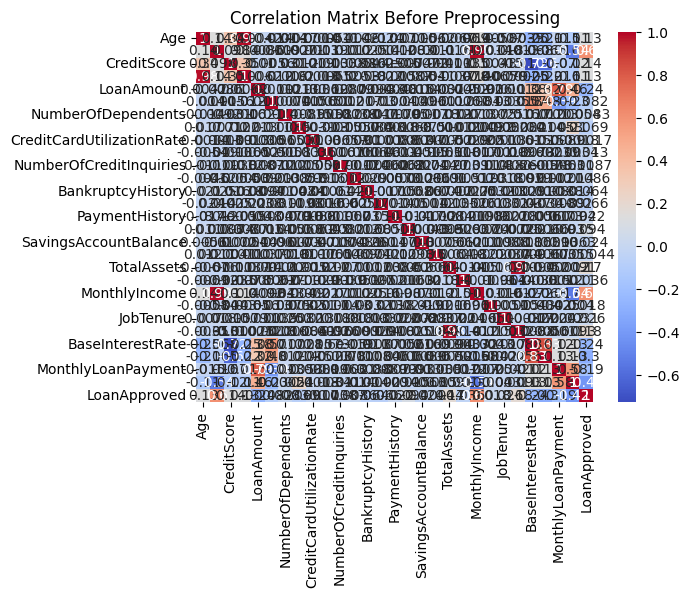

In [ ]:
# Correlation Matrix Before Preprocessing
corrMatrix = loan[numerical_features].corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Before Preprocessing")
plt.show()


In [ ]:
# Prepare Cleaned Data
loan_cleaned = loan.copy()
X = loan_cleaned.drop(columns='RiskScore')
y = loan_cleaned['RiskScore']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [ ]:
# Preprocess Data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [ ]:
# Transformed Training Data Sample
print("Transformed Training Data (First 5 Rows):")
print(X_train_processed[:5])


Transformed Training Data (First 5 Rows):
  (0, 0)	-1.1764705882352942
  (0, 1)	-0.5425767684152806
  (0, 2)	-0.36231884057971014
  (0, 3)	-1.0625
  (0, 4)	-0.7199716067535364
  (0, 5)	-1.5
  (0, 6)	0.6666666666666666
  (0, 7)	0.10218978102189781
  (0, 8)	-1.093088284163634
  (0, 10)	-0.5
  (0, 11)	-1.0125611202032077
  (0, 14)	-0.16666666666666666
  (0, 15)	-0.9285714285714286
  (0, 16)	1.1202651515151516
  (0, 17)	5.8449887205929745
  (0, 18)	-0.4868569711364812
  (0, 19)	3.2627970573508454
  (0, 20)	-0.5429368939023338
  (0, 21)	0.14592815119226668
  (0, 23)	-0.32251139151770064
  (0, 24)	-0.7499935195217915
  (0, 25)	-0.7140545707204542
  (0, 26)	0.4939550288742413
  (0, 27)	1.21566844028475
  (0, 3923)	1.0
  :	:
  (4, 7)	0.051094890510948905
  (4, 8)	-0.8859302420620455
  (4, 10)	0.5
  (4, 11)	-0.3795784634715043
  (4, 14)	-0.6666666666666666
  (4, 15)	-0.35714285714285715
  (4, 16)	0.7369791666666666
  (4, 17)	-0.37028681920721884
  (4, 18)	-0.3285916140049758
  (4, 19)	0.4156068

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


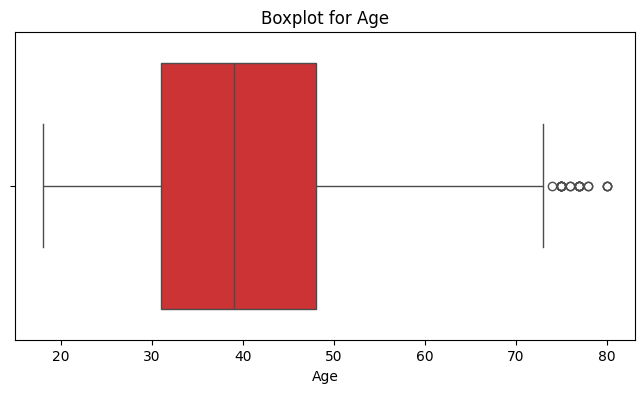

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


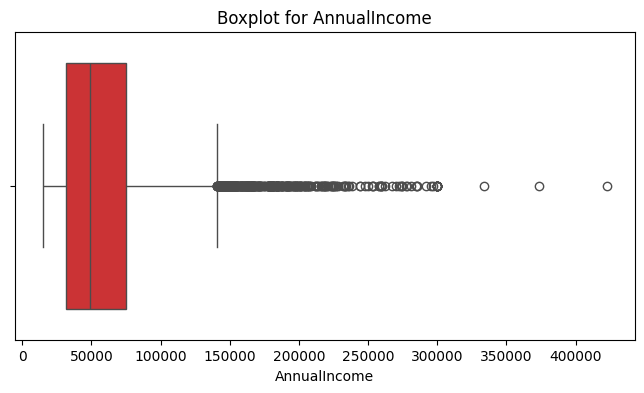

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


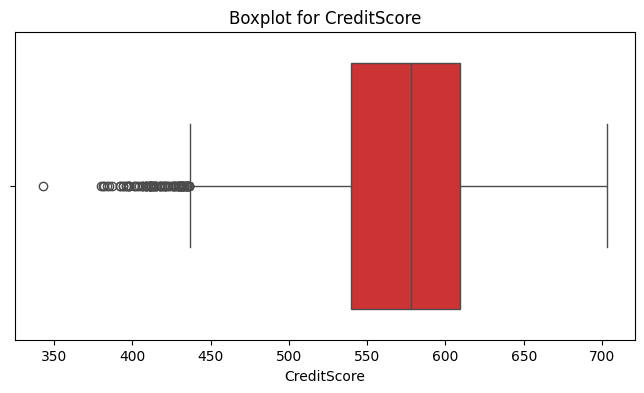

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


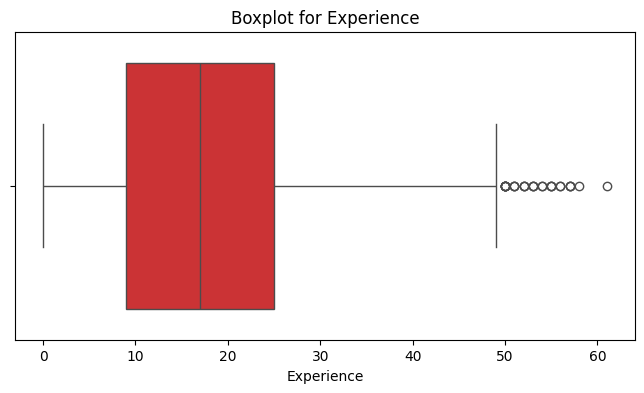

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


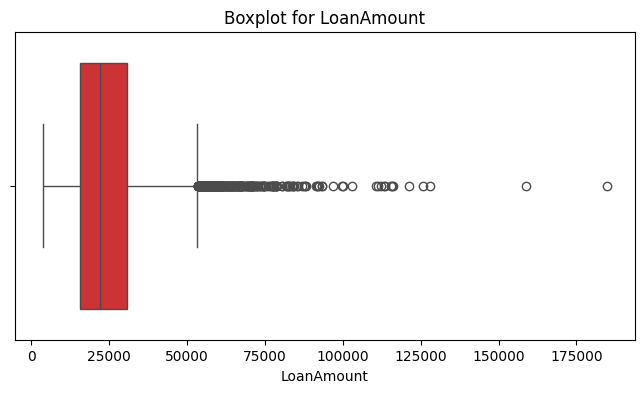

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


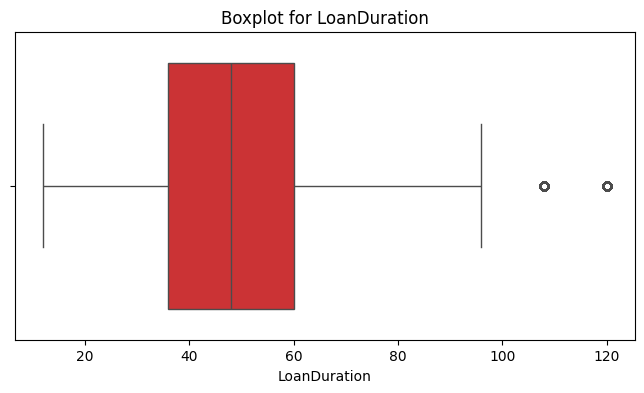

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


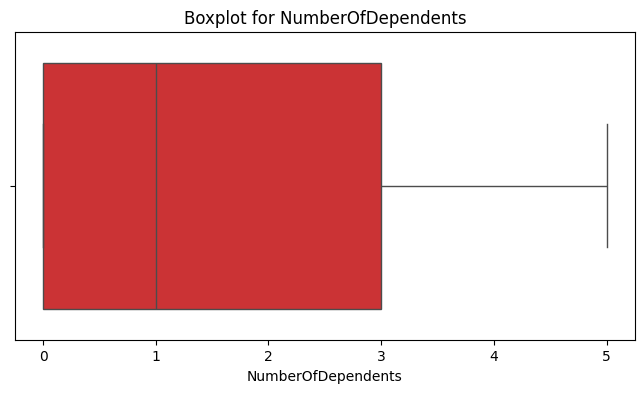

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


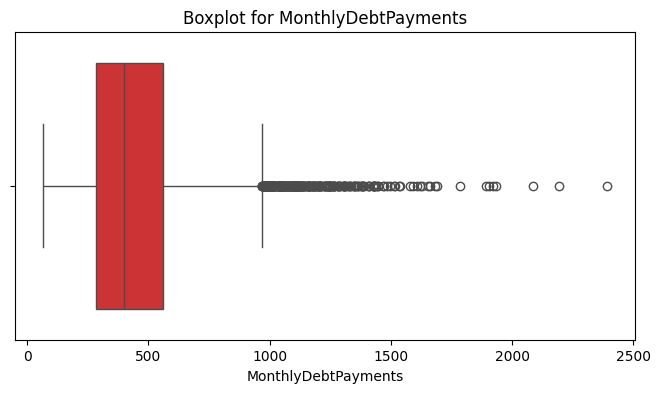

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


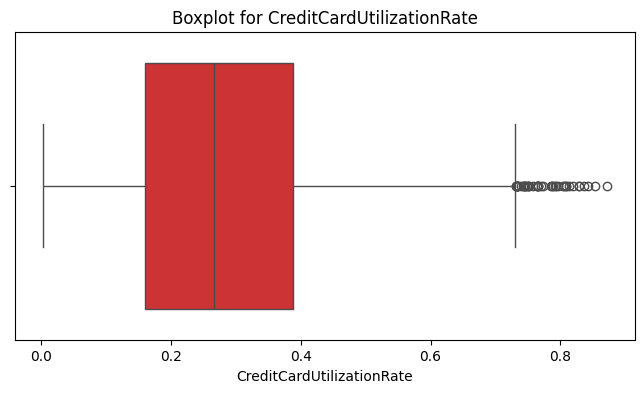

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


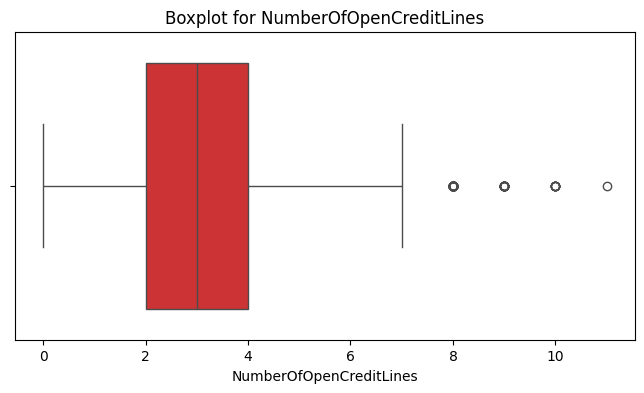

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


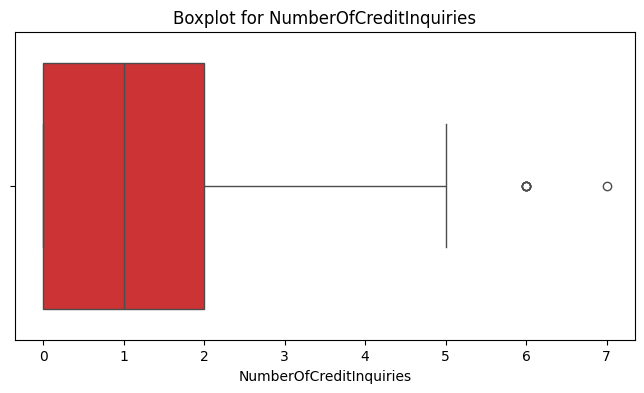

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


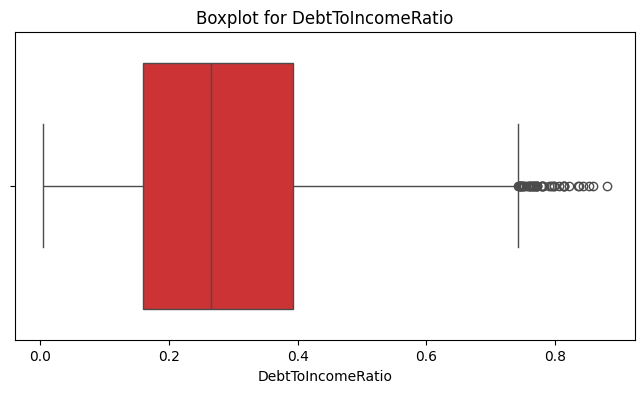

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


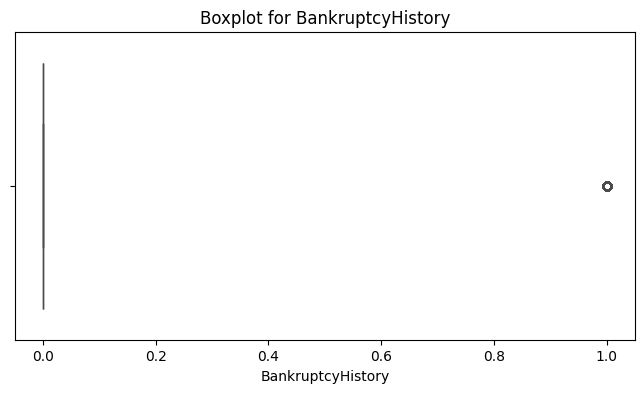

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


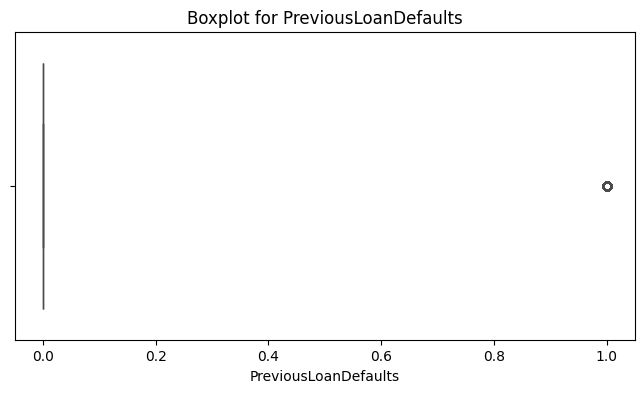

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


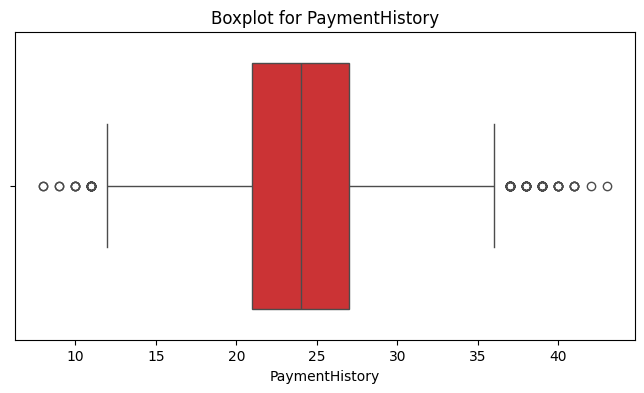

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


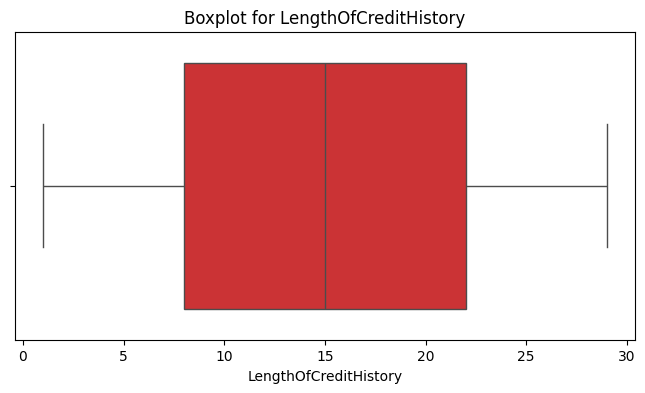

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


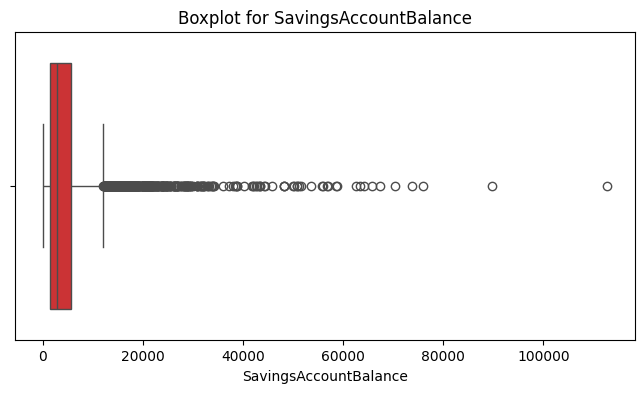

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


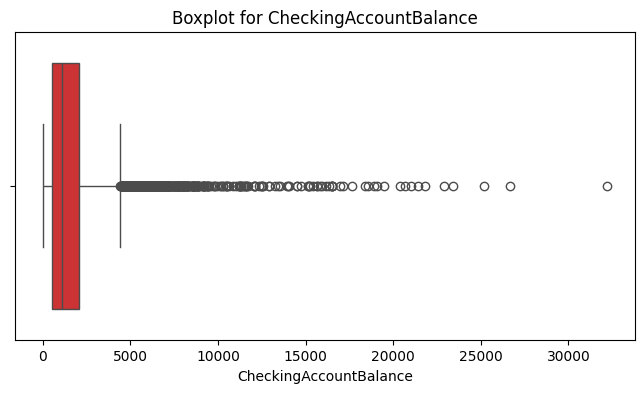

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


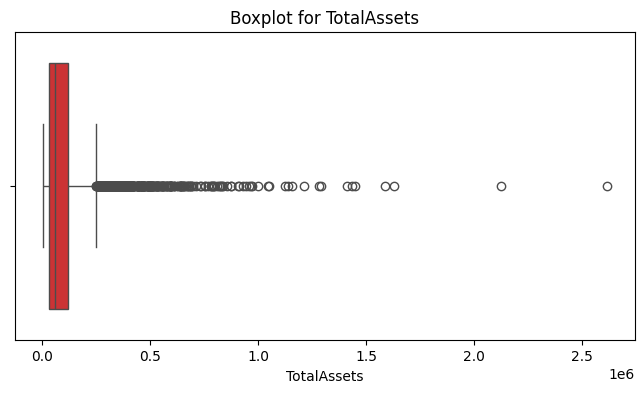

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


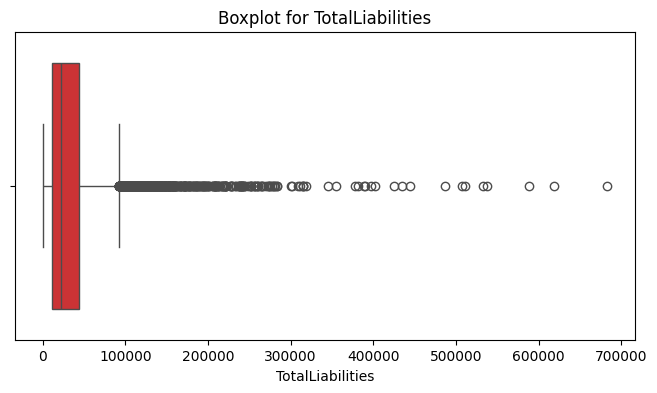

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


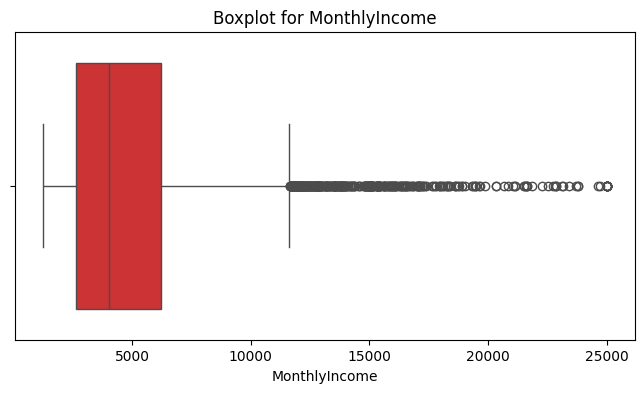

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


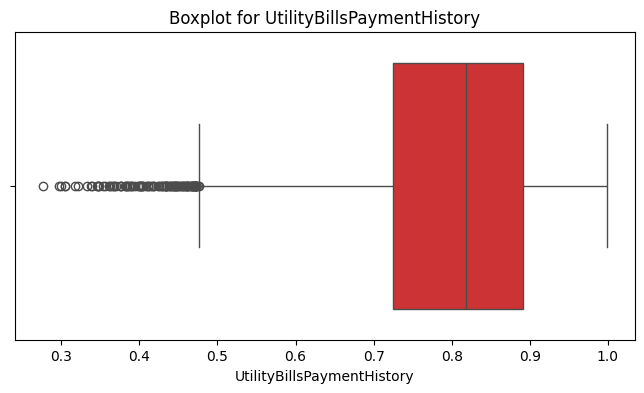

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


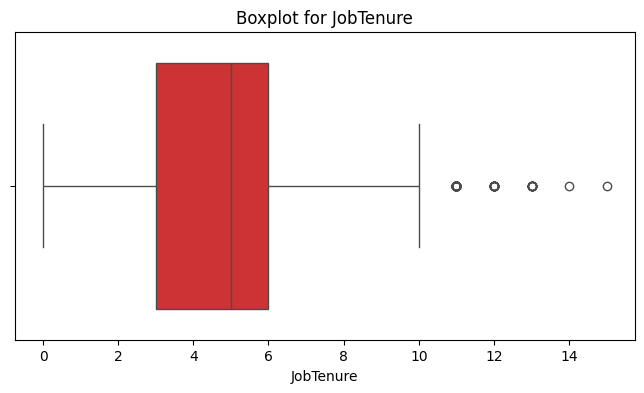

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


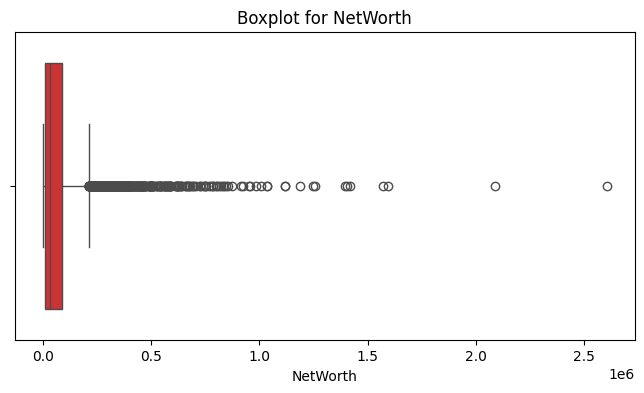

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


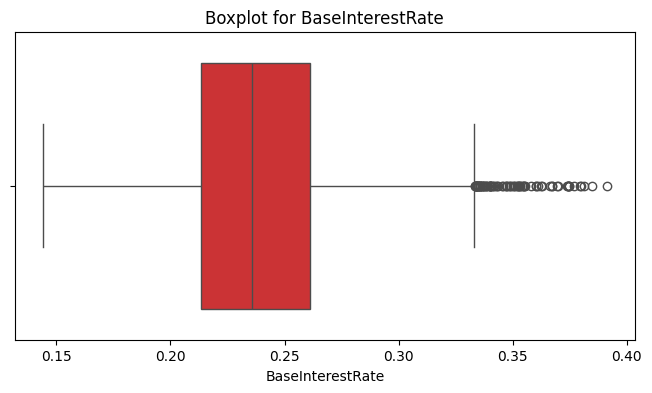

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


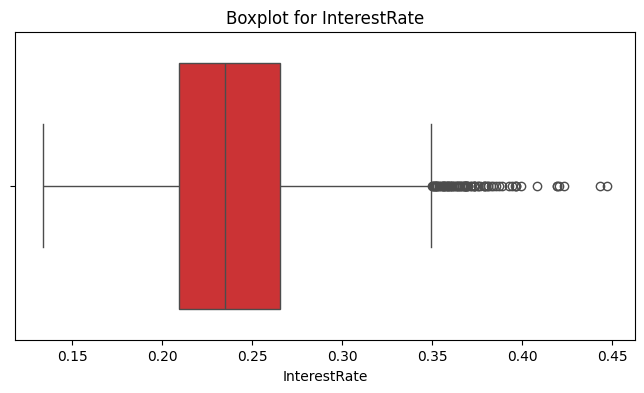

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


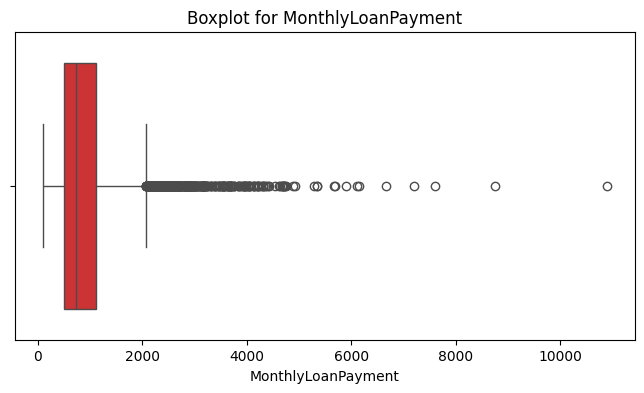

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


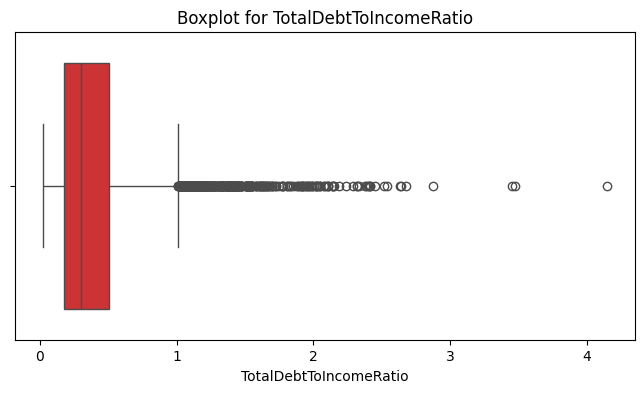

<ipython-input-26-9fe81848793a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')


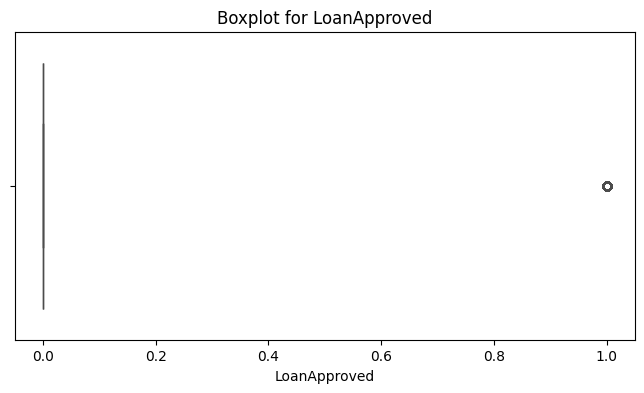

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan_cleaned[feature], orient='h', palette='Set1')
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.show()


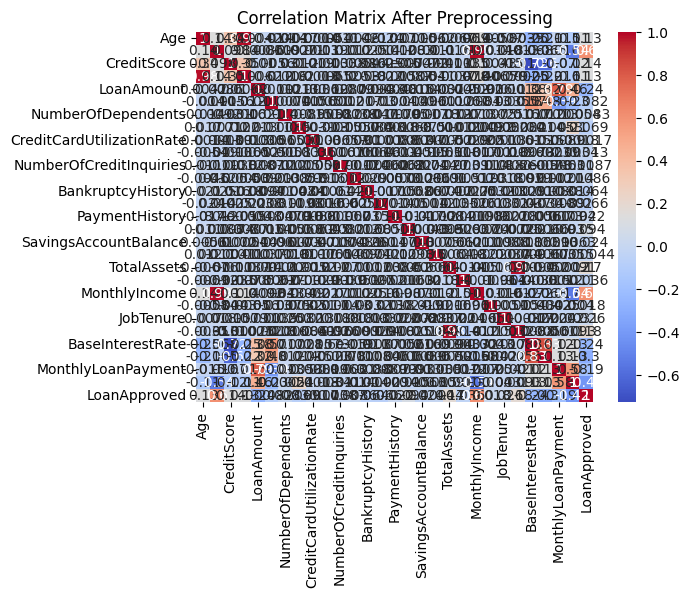

In [ ]:
# Correlation Matrix After Preprocessing
corrMatrix = loan_cleaned[numerical_features].corr()
sns.heatmap(corrMatrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix After Preprocessing")
plt.show()


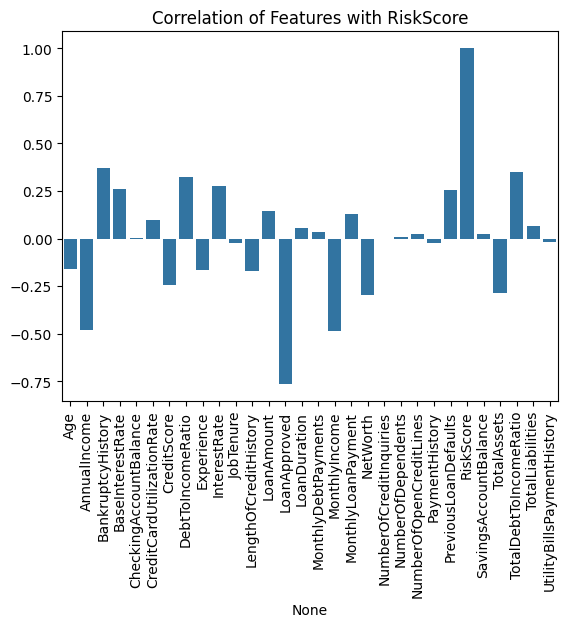

In [ ]:
# Correlation of Features with Target
if 'RiskScore' in loan_cleaned.columns:
    corr_target = loan_cleaned[numerical_features.union(['RiskScore'])].corr()['RiskScore']
    sns.barplot(x=corr_target.index, y=corr_target.values)
    plt.title('Correlation of Features with RiskScore')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("Column 'RiskScore' is missing from the dataset.")

In [ ]:
# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_processed, y_train)


LinearRegression()

In [ ]:
y_pred = linear_reg.predict(X_test_processed)

In [ ]:
# Evaluate Linear Regression
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
r2Score = r2_score(y_test, y_pred)

models_Errors = {'Linear Regression': {
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R2_Score': r2Score
}}

print(f"MSE for Linear Regression: {MSE}")
print(f"RMSE for Linear Regression: {RMSE}")
print(f"MAE for Linear Regression: {MAE}")
print(f"R2_Score for Linear Regression: {r2Score}")


MSE for Linear Regression: 3.689211674266218
RMSE for Linear Regression: 1.9207320672770105
MAE for Linear Regression: 1.5100182634153567
R2_Score for Linear Regression: 0.9399964239307174


In [ ]:
# K-Nearest Neighbors
KNN_Reg = KNeighborsRegressor(2)
KNN_Reg.fit(X_train_processed, y_train)

KNeighborsRegressor(n_neighbors=2)

In [ ]:
yhat = KNN_Reg.predict(X_test_processed)



In [ ]:
# Evaluation
MSE = mean_squared_error(y_test, yhat)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, yhat)
r2Score = r2_score(y_test, yhat)

models_Errors['KNN'] = {
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R2_Score': r2Score
}

print(f"MSE for KNN: {MSE}")
print(f"RMSE for KNN: {RMSE}")
print(f"MAE for KNN: {MAE}")
print(f"R2_Score for KNN: {r2Score}")


MSE for KNN: 32.52067774086378
RMSE for KNN: 5.7026903949683065
MAE for KNN: 4.135548172757475
R2_Score for KNN: 0.4710639743823668


In [ ]:
# Ridge Regression Model
ridge = Ridge()
ridge.fit(X_train_processed, y_train)

Ridge()

In [ ]:
yhat = ridge.predict(X_test_processed)


In [ ]:
# Evaluate Ridge Regression
MSE = mean_squared_error(y_test, yhat)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, yhat)
r2Score = r2_score(y_test, yhat)

models_Errors['Ridge'] = {
    'MSE': MSE,
    'RMSE': RMSE,
    'MAE': MAE,
    'R2_Score': r2Score
}

print(f"MSE for Ridge Regression: {MSE}")
print(f"RMSE for Ridge Regression: {RMSE}")
print(f"MAE for Ridge Regression: {MAE}")
print(f"R2_Score for Ridge Regression: {r2Score}")


MSE for Ridge Regression: 3.6877094393599656
RMSE for Ridge Regression: 1.9203409695572204
MAE for Ridge Regression: 1.509505866508424
R2_Score for Ridge Regression: 0.9400208571902942


In [ ]:
print(models_Errors)


{'Linear Regression': {'MSE': 3.689211674266218, 'RMSE': 1.9207320672770105, 'MAE': 1.5100182634153567, 'R2_Score': 0.9399964239307174}, 'KNN': {'MSE': 32.52067774086378, 'RMSE': 5.7026903949683065, 'MAE': 4.135548172757475, 'R2_Score': 0.4710639743823668}, 'Ridge': {'MSE': 3.6877094393599656, 'RMSE': 1.9203409695572204, 'MAE': 1.509505866508424, 'R2_Score': 0.9400208571902942}}


the result with power transform

In [ ]:
models_errors_df = pd.DataFrame(models_Errors).T
print("\nModel Errors Summary:")
print(models_errors_df)



Model Errors Summary:
                         MSE      RMSE       MAE  R2_Score
Linear Regression   3.689212  1.920732  1.510018  0.939996
KNN                32.520678  5.702690  4.135548  0.471064
Ridge               3.687709  1.920341  1.509506  0.940021
